In [1]:
import pandas as pd
import numpy as np
%pip install mlxtend
from mlxtend.plotting import plot_decision_regions

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 13.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.DataFrame()

In [6]:
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [7]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

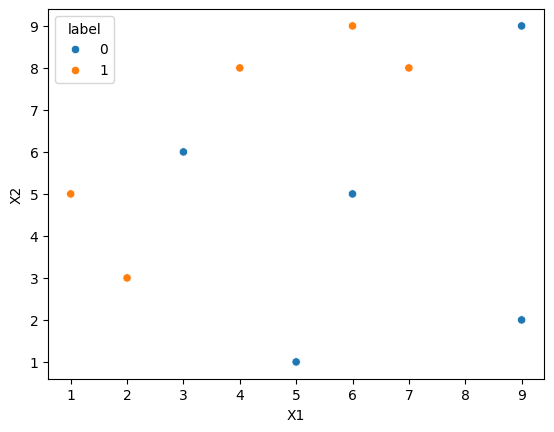

In [8]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [13]:
df['weights']=1/df.shape[0]
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [14]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)

In [15]:
X = df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [16]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

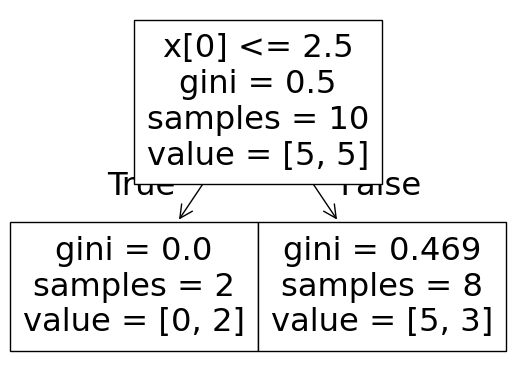

In [17]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

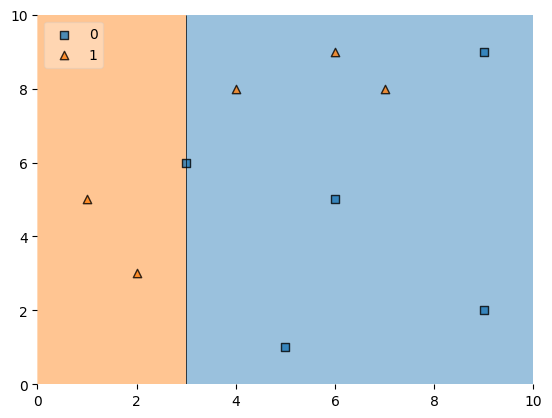

In [18]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [19]:
df['y_pred']=dt1.predict(X)

In [20]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [21]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [22]:
alpha1 = calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [24]:
def update_row_weight(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [25]:
df['updated_weights']=df.apply(update_row_weight,axis=1)

In [26]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [27]:
df['updated_weights'].sum()

np.float64(0.9165153319682015)

In [28]:
df['normalized_weights']=df['updated_weights']/df['updated_weights'].sum()

In [29]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [30]:
df['normalized_weights'].sum()

np.float64(1.0)

In [32]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [34]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [35]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]
     

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [41]:
def create_new_dataset(df):
    indices =[]

    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper']>a and a>row['cumsum_lower']:
                indices.append(index)
    return indices

In [42]:
index_values = create_new_dataset(df)

In [44]:
index_values

[1, 5, 9, 2, 5, 1, 8, 5, 8, 1]

In [43]:
second_df  = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weights
1,2,3,1,0.1
5,6,9,1,0.1
9,9,2,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1
1,2,3,1,0.1
8,9,9,0,0.1
5,6,9,1,0.1
8,9,9,0,0.1
1,2,3,1,0.1


In [45]:

dt2 = DecisionTreeClassifier(max_depth=1)

In [46]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
     

In [47]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 7.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.625, 0.5, '  False')]

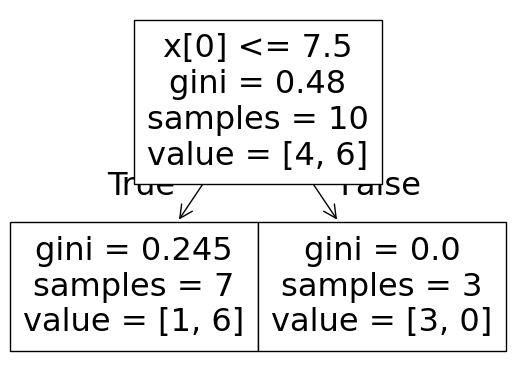

In [48]:


plot_tree(dt2)

<Axes: >

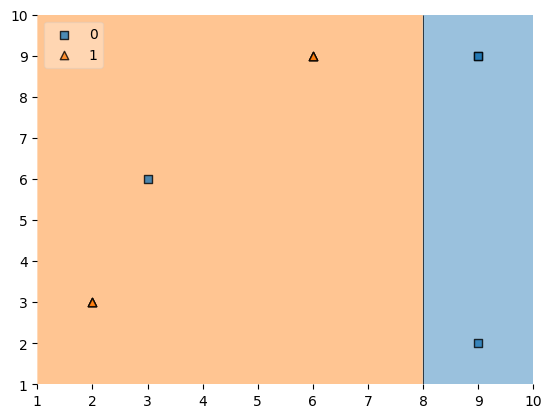

In [49]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [50]:
second_df['y_pred'] = dt2.predict(X)
     

In [51]:


second_df


,X1,X2,label,weights,y_pred
1,2,3,1,0.1,1
5,6,9,1,0.1,1
9,9,2,0,0.1,0
2,3,6,0,0.1,1
5,6,9,1,0.1,1
1,2,3,1,0.1,1
8,9,9,0,0.1,0
5,6,9,1,0.1,1
8,9,9,0,0.1,0
1,2,3,1,0.1,1


In [52]:
alpha2 = calculate_model_weight(0.1)

In [53]:
alpha2

np.float64(1.0986122886681098)

In [54]:
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [ ]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
second_df

,X1,X2,label,weights,y_pred,updated_weights
1,2,3,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622
9,9,2,0,0.1,0,0.033622
2,3,6,0,0.1,1,0.297427
5,6,9,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
1,2,3,1,0.1,1,0.033622


In [58]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
1,2,3,1,0.1,1,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,1,0.297427,0.495694
5,6,9,1,0.1,1,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034


In [59]:
second_df['nomalized_weights'].sum()

np.float64(0.9999999999999999)

In [60]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [61]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']


In [62]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]


,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
1,2,3,1,0.1,1,0.056034,0.000000,0.056034
5,6,9,1,0.1,1,0.056034,0.056034,0.112068
9,9,2,0,0.1,0,0.056034,0.112068,0.168102
2,3,6,0,0.1,1,0.495694,0.168102,0.663796
5,6,9,1,0.1,1,0.056034,0.663796,0.719830
1,2,3,1,0.1,1,0.056034,0.719830,0.775864
8,9,9,0,0.1,0,0.056034,0.775864,0.831898
5,6,9,1,0.1,1,0.056034,0.831898,0.887932
8,9,9,0,0.1,0,0.056034,0.887932,0.943966
1,2,3,1,0.1,1,0.056034,0.943966,1.000000


In [66]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [67]:
dt2.predict(query)

array([1])

In [ ]:
alpha1*1 + alpha2*(1)

np.float64(1.5222612188617117)

In [70]:
np.sign(1.09)

np.float64(1.0)

In [71]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0])

In [72]:
dt2.predict(query)

array([0])

In [73]:
alpha1*(1) + alpha2*(-1)

np.float64(-0.674963358474508)

In [74]:
np.sign(-0.25)

np.float64(-1.0)